# Ngày 2: K-means Clustering

## Phần 1: Giới thiệu

Trong ngày 1 ta đã thảo luận qua về mô hình Machine Learning - mô hình đơn giản nhất trong các bài toán học có giám sát. Trong ngày hôm nay tôi sẽ giới thiệu bạn 1 bài toán cũng rất đơn, nhưng không phải là ở chủ đề học có giám sát mà là học không giám sát (Unsupervised Learning), đó là thuật toán phân cụm K-means Clustering.

Trong thuật toán về phân cụm K-means Clustering, các điểm dữ liệu đầu vào của chúng ta không có đánh nhãn (label). Mục đích chính của thuật toán này là làm sao để phân hoạch các dữ liệu này thành vào từng 1 nhóm có tính chất giống nhau. Nó giống kiểu khi đi học chưa có kết quả thi hay tổng kết, các giáo viên thường chia các học sinh trong lớp thành thành từng nhóm bạn có thành tích học tập tốt dựa trên giác quan và đánh giá cá nhân để biết những học sinh nào học khá, giỏi học sinh nào đang bị đuối để chăm sóc riêng (chưa biết kết quả).

Xét 1 bài toán: 1 công ty làm game quyết định ra tính năng Vip 1, Vip 2, Vip 3, hoặc là không có vip dựa trên số giờ người đó chơi và số tiền đã nạp vào, từ đó công ty có những chính sách ưu đãi như tặng vật phẩm cho các người chơi thuộc nhóm vjp 1, vjp 2, vjp 3,... Giả sử công ty game đó có game rất rất nhiều người chơi, nhưng trước đó công ty chưa ra tính năng phân hạng vjp như vậy. Nếu mà với 1 bài toán như trên hỏi những người biết về Machine Learning, ắt hẳn họ sẽ gợi ý bạn sử dụng K-means Clustering. Bởi vì nó là thuật toán căn (và gần như đầu tiên) mà họ sẽ được học thông qua đào tạo, sách, khóa học,... Sau khi công ty game ấy phân ra thành từng nhóm người chơi như thế thì sẽ 1 cuộc update server cập nhật Vip cho người chơi, quà cáp,... Đó là công việc phía sau nơi mà các nhà vận hành game đảm nhiệm.

Ý tưởng đơn giản nhất về cluster (cụm) là một tập hợp các điểm ở gần nhau trong không gian. Ví dụ hình bên dưới chia thành 3 điểm có 3 màu sắc khác nhau (chúng gần nhau thành 1 cụm)

![Ví dụ cluster](https://machinelearningcoban.com/assets/kmeans/figure_2.png)

Như trên hình ta thấy, các điểm cluster có 1 điểm đại diện (màu vàng). Những điểm xung quanh gần cluster ấy sẽ thuộc về 1 nhóm với cluster đó. Một cách đơn giản nhất, với 1 tọa độ bất kỳ, ta kiểm tra khoảng cách giữa tọa độ đó đến cluster nào gần nhất thì nó thuộc cùng 1 nhóm với cluster đó.

Ta sẽ có 1 bài toán thú vị: Trong một đại dương có 3 cái đảo, làm sao để phân hoạch vùng đại dương đó thành các vùng lãnh thổ của các đảo. Một tọa độ trên biển sẽ thuộc về 1 đảo nào đó khi khoảng cách từ tọa độ đó đến đảo đó bé hơn khoảng cách tới 2 đảo còn lại.

Ví dụ bên dưới là bài toán vùng biển nhưng với 5 đảo:

![Ví dụ Clustering 5 đảo](https://machinelearningcoban.com/assets/kmeans/figure_1.png)

Ta có thể thấy đường phân chia các lãnh thổ này là 1 đường thẳng. Nên lãnh thổ của 5 đảo này là 1 hình đa giác. Cách chia trên về mặt toán học là [Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram)

Giờ mở rộng thêm 1 chiều không gian thành không gian 3 chiều, ta tưởng tượng như là vũ trụ, với mỗi cluster sẽ là 1 hành tinh, ta cần xác định tọa độ đó trong vũ trụ thuộc vào hành tinh nào? Với không gian nhiều chiều hơn nó sẽ trở thành thứ Hyperpolygon

Quay lại với bài toán phân nhóm (cụ thể K-means Clustering) ta sẽ phân tích chúng 1 chút (nó cũng khá đơn ấy).

## Phần 2: Phân tích toán học

### Mục đích bài toán

Mục đích của bài toán này là để phân nhóm: Từ dữ liệu đầu vào và số lượng nhóm chúng ta hãy tìm ra center của mỗi nhóm và phân hoạch các điểm dữ liệu vào các nhóm tương ứng. Assumption (giả định rằng) các điểm dữ liệu chỉ duy nhất và chỉ một nhóm.

### Một số ký hiệu toán học

Ta có đầu vào là $N$ điểm dữ liệu với 1 điểm dữ liệu có $M$ thuộc tính $X = (x_1,x_2,x_3,x_4,...,x_n)$ (Các thuộc tính dữ liệu được xếp theo hàng) ($X \in \R^{N \times M}$) và số lượng nhóm ta muốn N điểm dữ liệu phân hoạch vào. Mong muốn ta là tìm ra $K$ ($K < N$) điểm center $M = (m_1,m_2,m_3,...,m_k)$ ($M \in R^{k \times m}$)

> Lưu ý: Các ký hiệu toán học từ ngày 2 trở đi sẽ theo 1 quy tắc: 
- X tương ứng với ma trận đầu vào với các điểm dữ liệu được xếp thành hàng.
- Y là ma trận đánh nhãn được xếp theo cột.
- N là số điểm dữ liệu
- M là số chiều của dữ liệu (số thuộc tính)

### ONE HOT

ONE HOT là một kỹ thuật biểu diễn phổ biến trong Machine Learning cho những thuộc tính phân loại (thuộc tính mang giá trị rời rạc).

Ví dụ thuộc tính phân loại x có giá trị $x \in \{Dev,Debug,Sleep\}$ thì thuộc tính x sau khi ONE HOT sẽ nhận thành các giá trị vector gồm 3 chiều (cùng chiều với số giá trị phân loại), mà tại đó với tất cả các giá trị của vector ấy sẽ = 0, ngoại trừ duy nhất giá trị cùng với label phân loại ấy sẽ là một. Giả sử ta có $x = "Dev"$ sau khi ONE HOT sẽ là $\vec{x} = (1,0,0)$, trong các vector ONE HOT chỉ có 1 và chỉ 1 số 1 trong vector thể hiện giá trị phân loại của giá trị ấy $\vec{x} = (1,1,0)$ sẽ không là ONE HOT vector.

### TIẾP TỤC BÀI TOÁN

Với mỗi dữ liệu $\vec{x_i}$ đặt $\vec{y_i} = (y_{i1},y_{i2},y_{i3},...,y_{im})$ là vector ONE HOT label vector của nó (nếu $x_i$ phân vào nhóm t nào đó thì $y_{it} = 1,y_{ij} = 0, \forall j != t$)

Ràng buộc $\vec{y_i}$ có thể được viết dưới dạng:
$$
\begin{equation}
y_{ik} \in \{0,1\}, \sum_{k = 1}^{K} y_{ik} = 1
\end{equation}
$$

### Hàm sai số và bài toán tối ưu

Nếu ta coi $\vec{m_k}$ là center (hoặc representative) của mỗi cluster và ước lược tất cả các điểm dữ liệu đường phân hoạc vào cluster này bởi $\vec{m_k}$. Một điểm dữ liệu $\vec{x_i}$ được phân hoạch vào cluster $k$ sẽ có một lượng sai số (ta chọn cách tính sai số là khoảng cách từ điểm đó đến cluster đó) là $\|\vec{x_i} - \vec{m_k}\|^2$.

Hơn nữa, vì $x_i$ được phân hoạch vào cluster $k$ nên $y_{ik} = 1; y_{ij} = 0, \forall j != k$, khi đó biểu thức bên trên sẽ được viết lại:
$$y_{ik}\|\vec{x_i} - \vec{m_k}\|^2 = \sum_{j=1}^{K}y_{ij}\|\vec{x_i} - \vec{m_j}\|^2$$

Tổng sai số cho toàn bộ dữ liệu là:
$$
\mathcal{L}(M,Y) = \sum_{i=1}^{N}\sum_{j=1}^{K}y_{ij}\|\vec{x_i}-\vec{m_j}\|^2
$$

Trong đó M,Y lần lượt là ma trạn được tạo bởi center của các cluster và ONE HOT label vector của dữ liệu. Hàm sai số trong bài toán K-means Clustering là hàm $\mathcal{L}(M,Y)$ với ràng buộc (1), ta cần phải tìm ra được M,Y sao cho hàm $\mathcal{L}(M,Y)$ đạt giá trị nhỏ nhất.

$$M,Y = \underset{M,Y}{\text{argmin}}\mathcal{L}(M,Y) = \underset{M,Y}{\text{argmin}}\sum_{i=1}^{N}\sum_{j=1}^{K}y_{ij}\|\vec{x_i}-\vec{m_j}\|^2$$

Subject to: $y_{ij} \in \{0,1\} \forall i,j; \sum_{j=1}^{K} y_{ij} = 1$

### Thuật toán tối ưu hàm mất mát

Bài toán trên là bài toán khó tìm điểm tối ưu vì có thêm điều kiện ràng buộc. Bài toán này thuộc loại mix-integer programming (điều kiện là số nguyên) là loại khó tìm nghiệm mà hàm đạt giá trị nhỏ nhất. Tuy nhiên trong một số trường hợp chúng ta vẫn có thể tìm được nghiệm gần đúng để hàm đạt giá trị cực tiểu.

Tư tưởng của thuật toán là xen kẽ giữa việc xen kẻ giải Y và M khi biên còn lại được cố định. Đây là một bài toán lặp sử dụng phổ biến để giải bài toán này. Chúng ta sẽ xét lần lượt 2 bài toán sau:

#### Cố định M tìm Y

Giả sử rằng ta tìm được các centers, hãy tìm các ONE HOT vector label $Y$ để hàm sai số $\mathcal{L}$ đạt giá trị nhỏ nhất. Điều này tương đương tìm cluster cho mỗi điểm dữ liệu.

Khi các centers là cố định, bài toán tìm ONE HOT vector $Y$ cho toàn bộ dữ liệu có thể phân tách thành bài toán con như sau:
$$y_i = \underset{y_i}{\text{argmin}}\sum_{j=1}^{K} y_{ij} \|\vec{x_i} - \vec{m_j}\|^2$$

Subject to: $y_{i,j} \in \{0,1\} \forall j; \sum_{j=1}^{K}y_{ij} = 1$

Vì vector $\vec{y_i}$ là vector ONE HOT nên chúng chỉ có 1 giá trị là 1 đại diện cho label cluster của dữ liệu $\vec{x_i}$ nên ta có thể viết phương trình trên thành dạng đơn giản hơn:
$$j = \underset{j}{\text{argmin}}\|\vec{x_i} - \vec{m_j}\|^2$$

Từ công thức trên ta thấy nó thành bài toán với điểm dữ liệu $\vec{x_i}$ ta sẽ tìm ra cluster có khoảng cách với dữ liệu $\vec{x_i}$ là nhỏ nhất.

#### Cố định Y tìm M

Giả sử ta đã tìm được Cluster của từng điểm dữ liệu, giờ ta cần sắp xết các Cluster lên không gian sao cho cực tiểu được hàm sai số.

Một khi chúng ta xác được label vector $\vec{Y}$ cho từng điểm dữ liệu, bài toán tìm centers sẽ được rút gọn lại là:
$$m_j = \underset{m_j}{\text{argmin}}\sum_{i=1}^{N}y_{ij}\|\vec{x_i} - \vec{m_j}\|^2$$

Tới đây ta có thể giải nghiệm bằng phương pháp lấy đạo hàm bằng 0, vì hàm cần tối ưu là một hàm liên tục và có đạo hàm xác định tại mọi điểm. Quan trọng hơn, hàm này là hàm lồi (Convex Function này mình sẽ thảo luận sau) theo $m_j$ nên chúng ta sẽ tìm được giá trị nhỏ nhất và điểm tương ướng cho giá trị nhỏ nhất ấy.

Gọi hàm $\mathcal{L}(\vec{m_j}) = \sum_{i = 1}^{N}y_{ij}\|\vec{x_i} - \vec{m_j}\|^2$

$$\frac{\mathcal{L}(m_j)}{m_j} = 0$$
$$<=> 2 * \sum_{i=1}^{N} y_{ij}(\vec{x_i}-\vec{m_j}) = 0$$
$$<=> \sum_{i=1}^{N}y_{ij}\vec{x_i} = \sum_{i=1}^{N}y_{ij}\vec{m_j}$$
$$\vec{m_j} = \frac{\sum_{i = 1}^{N}y_{ij}\vec{x_{ij}}}{\sum_{i=1}^{N}y_{ij}}$$

Nếu để ý thì ta có một điều kiện ràng buộc (Subject to) mà ta vẫn hay ghi phía trên, nên mẫu số lúc này nó chính là phép đến cluster được phân hoạch vào điểm $j$ còn tử số sẽ là tổng điểm dữ liệu trong cluster $j$.

Hay nói cách khác: $m_j$ là trung bình các điểm có label là $j$.

### Tóm tắt thuật toán

Đầu vào: Dữ liệu X và K

Đầu ra: Các center $M$ và label ONE HOT vector $Y$ tương ứng cho từng điểm dữ liệu.

1. Chọn $K$ điểm bất kỳ làm Center đầu.
2. Phân mỗi điểm dữ liệu vào cluster gần nhất.
3. Cập nhật cluster bằng cách lấy trung bình các điểm được phân vào cluster đó.
4. Quay lại bước 2

Thuật toán sẽ lặp hữu hạn lần, bạn có thể dừng khi việc gán các cluster của bước trước khác của bước sau (vì nếu nó không khác thì tức là vị trí cập nhật nó cũng sẽ như cũ và không thay đổi so với bước trước do cũng tính cùng 1 trung bình cộng của các điểm được gắn cluster) .

### Ví dụ trên python

Ta sẽ đi tới ví dụ cơ bản. Trước hết ta chọn center cho từng cluster và tạo dữ liệu cho từng cluster bằng cách lấy mẫu theo phân phối chuẩn có kỳ vọng là center của cluster đó và ma trận hiệp phương sai (Covarience Matrix) là ma trận đơn vị.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

Ta tạo ra 3 điểm cluster lần lượt có tọa độ là $(2,2), (8,3), (3,6)$ ma trận hiệp phương sai chúng giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. Mỗi điểm dữ liệu được xếp thành hàng ngang trong ma trận $X$

In [33]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

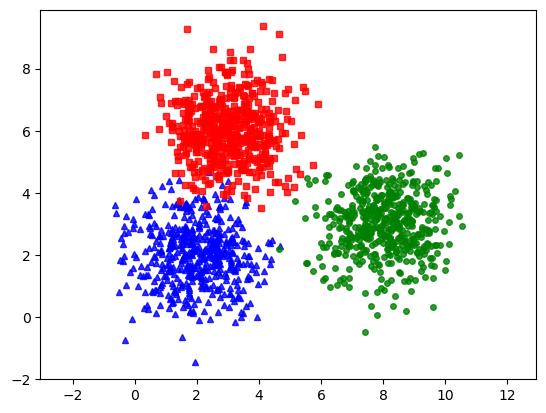

In [34]:
#Hàm hiển thị dữ liệu
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

Mỗi cluster tương ứng với 3 màu R,G,B. Một vài điểm màu đỏ lẫn vào điểm màu xanh.

Ta thiết kế vài hàm cần thiết:
1. kmeans_init_centers để khởi tạo các centers ban đầu
2. kmeans_assign_centers để tìm ra các cluster của từng điểm dữ liệu
3. kmeans_update_centers để cập nhật các centers mới dựa trên dữ liệu đã gán nhãn (cluster)
4. has_coverged để kiểm tra điều kiện dừng (điều kiện dừng ở đây mình dùng sẽ là việc gán cluster của từng điểm dữ liệu giống có kết quả giống với vòng lặp trước)

In [38]:
def kmeans_init_centers(X,K):
    return X[np.random.choice(X.shape[0],K,replace = False)]

def kmeans_assign_centers(X,M):
    D = cdist(X,M)
    return np.argmin(D,axis=1)

def kmeans_update_centers(X,clusters):
    K = np.max(clusters) + 1
    M = np.zeros((K,X.shape[1]))
    for k in range(K): M[k] = np.mean(X[clusters == k],axis = 0)
    return M

def has_coverged(cluster_prev,cluster_cur):
    return np.sum(cluster_prev == cluster_cur) == len(cluster_prev)

In [39]:
#Hàm kmeans thực sự
def kmeans(X,K):
    M = kmeans_init_centers(X,K)
    cluster_prev = np.full(X.shape[0],-1)
    while True:
        cluster_cur = kmeans_assign_centers(X,M)
        if has_coverged(cluster_prev,cluster_cur): return M
        M = kmeans_update_centers(X,cluster_cur)
        cluster_prev = cluster_cur


Centers found by kmeans: 
[[1.9780868  2.0065323 ]
 [8.0410628  3.02094748]
 [2.9898012  6.03271696]]


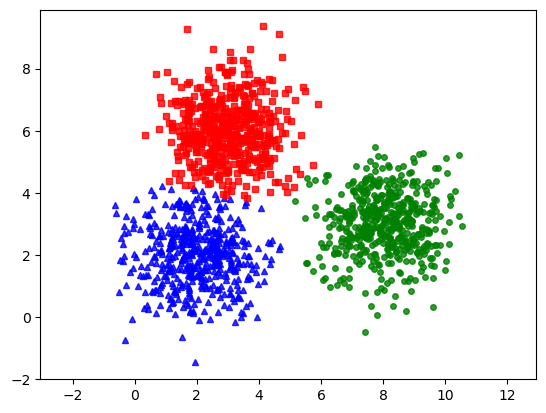

In [47]:
M = kmeans(X,K)
Y = kmeans_assign_centers(X,M)

print(f"Centers found by kmeans: \n{M}")
kmeans_display(X,Y)

Ta thấy thuật toán kmeans (nhà làm) của chúng ta làm việc khá thành công khi chúng chia các điểm dữ liệu thành 3 nhóm riêng biệt có thể quan sát. Bên dưới là cách hoạt động của kmeans qua từng iterator.

![Kmeans work](https://machinelearningcoban.com/assets/kmeans/kmeans11.gif)

Xem thêm các visualization ở [Đây](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

### Bây giờ ta thử dùng thư viện của sklearn để kiểm tra

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


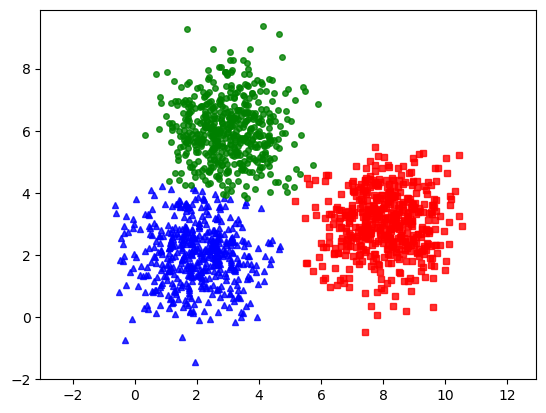

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

## Phần 4: Thảo luận

Có một vài hạn chế:
- Làm sao để xác định được bao nhiêu điểm cluster? Thực tế nhiều bài toán ta khó có thể xác định được bao nhiêu điểm để phân hoạch hợp lý. Có một phương pháp giúp ta xác định cái này là phương pháp [Elbow Method](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)
- Lời giải còn phải phụ thuộc vào vị trí các điểm centers ban đầu, Điều nó có thể khiến sai số bài toán chỉ có thể tiến tới hàm cực tiểu chứ chưa đạt được giá trị nhỏ nhất. Hình bên dưới minh họa:
![Kiểu 1](https://machinelearningcoban.com/assets/kmeans/kmeans_slowconverge.gif)

- Hoặc:
![Loại 2](https://machinelearningcoban.com/assets/kmeans/kmeans_badresult.gif)

Nhiều dữ liệu phân bố có thể không tập trung 1 điểm mà có thể dẹt ra chiều ngang hoặc nó không "tròn" lắm sẽ sẽ không tối ưu.
![Loại 3](https://machinelearningcoban.com/assets/kmeans/kmeans_diffcov.gif)

Mặc dù có nhiều hạn chế nhưng đây vẫn là thuật toán quan trọng trong machine learning và là nền tảng của những thuật toán phức tạp khác. Nên mình vẫn ít nhất pay some respect!